In [1]:
from pymongo import MongoClient
import pandas as pd

In [11]:
client = MongoClient('localhost', 27017)
db = client['Bitcoin']
df = pd.DataFrame(db.data.find())
df = df[["timestamp", "price_usd"]]
# df.rename(columns={'timestamp': 'ds', 'price_usd': 'y'}, inplace=True)
df = df.set_index("timestamp")

<AxesSubplot:xlabel='timestamp'>

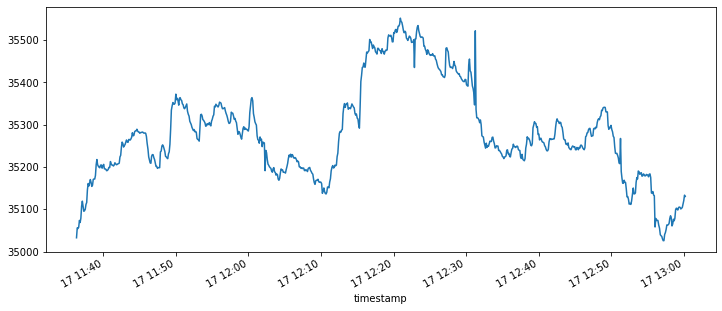

In [13]:
df['price_usd'].plot(figsize=(12, 5))

In [18]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
ad_test(df['price_usd'])

1. ADF :  -1.969649630784548
2. P-Value :  0.3000371356534179
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression: 829
5. Critical Values :
	 1% :  -3.438262743153934
	 5% :  -2.8650327208928976
	 10% :  -2.5686298171529347


In [20]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(df['price_usd'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6788.294, Time=1.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6797.783, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6786.346, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6787.471, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6795.838, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6787.358, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6787.705, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.67 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6784.414, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=6785.423, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6785.772, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6785.539, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.49 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 5.637 seconds


In [21]:
df.shape

(831, 1)

In [22]:
train=df.iloc[:-31]
test=df.iloc[-31:]
print(train.shape,test.shape)

(800, 1) (31, 1)


In [25]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(train['price_usd'],order=(1,1,0))
model=model.fit()
model.summary()

C:\Users\Utilisateur\Anaconda3\envs\MachineLearning\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Utilisateur\Anaconda3\envs\MachineLearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.price_usd   No. Observations:                  799
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3273.616
Method:                       css-mle   S.D. of innovations             14.559
Date:                Mon, 18 Jan 2021   AIC                           6553.232
Time:                        13:38:05   BIC                           6567.282
Sample:                             1   HQIC                          6558.630
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0060      0.455     -0.013      0.990      -0.897       0.885
ar.L1.D.price_usd    -0.1328      0.035     -3.783      0.000      -0.202      -0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -7.5317           +0.0000j            7.5317            0.5000
-----------------------------------------------------------------------------
"""

C:\Users\Utilisateur\Anaconda3\envs\MachineLearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Utilisateur\Anaconda3\envs\MachineLearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


0      35032.704459
1      35052.899155
2      35054.734507
3      35057.162443
4      35071.522137
           ...     
865    35030.266679
866    35030.260702
867    35030.254725
868    35030.248747
869    35030.242770
Name: ARIMA Predictions, Length: 870, dtype: float64

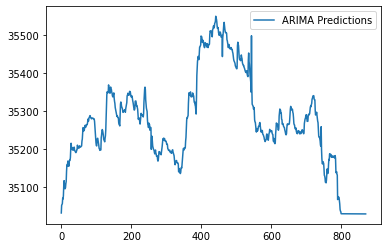

In [78]:
start=len(train)
end=len(train)+len(test)-1

pred=model.predict(start=1, end=870, typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
#df['price_usd'].plot(legend=True)
pred

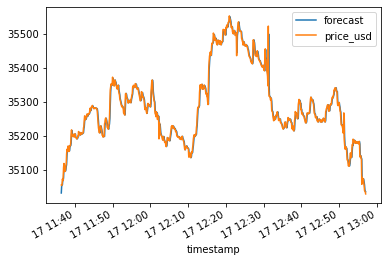

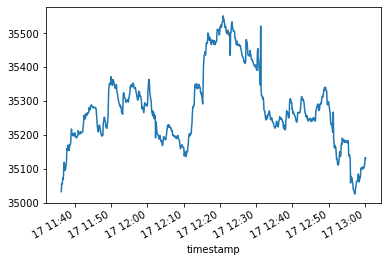

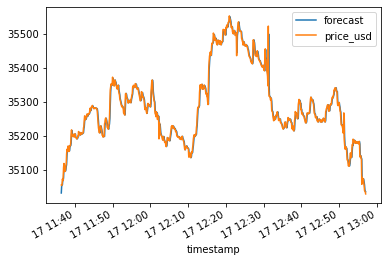

In [48]:
df['price_usd'].plot()
model.plot_predict().

In [38]:
from datetime import datetime

In [43]:
a=df.index[0].to_pydatetime()
a

datetime.datetime(2021, 1, 17, 11, 36, 19, 270000)

In [39]:
datetime.fromtimestamp(df.index[0])

TypeError: an integer is required (got type Timestamp)